In [4]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [6]:
#Establecer directorio de datos

DIR='/Users/alex/Desktop'
FILE='/adjmatrix.tsv'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/alex/Desktop/adjmatrix.tsv


In [7]:
data=pd.read_table(file)
a=np.diag(np.ones(16438),0)
A=data-a

In [10]:
#Este modulo calcula un valor umbral ("threshold") que promedia todos los valores de las 
# entradas de un data set

# Función convertir a lista el resultado de aplicar .mean() a un DataFrame

def mean_to_list(df):
    arr=[]
    for i in range(0,len(df)):
        a=df.iloc[i]
        arr.append(a)
    return arr

# Función para calcular el promedio de las entradas de una lista 

def cal_prom_en_list(num):
    sum_num=0
    for entrada in num:
        sum_num=sum_num +entrada
        
    prom = sum_num/len(num)
    return prom

# Cálculo del umbral, promediando sobre todas las entradas de la matriz de adyacencia

A_prom_cols=A.mean()
A_mean_list=mean_to_list(A_prom_cols)
cal_prom_en_list(A_mean_list)
threshold=cal_prom_en_list(A_mean_list)

0.018990814050501657

In [11]:
#Este script es capaz de dibujar el grafo con sus vértices respectivos etiquetados

#Aún se necesita modificar para que sea capaz de etiquetar los ID de los genes involucrados
#por muy granden que sea la matriz de adyacencia asociada al grafo

def plt_gph_with_vert_lab(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    
    
    pos=nx.spring_layout(adj_to_graph)
    
    nx.draw_networkx_nodes(adj_to_graph,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
    
    nx.draw_networkx_nodes(adj_to_graph,pos,
                       nodelist=[4,5,6],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
    
    nx.draw_networkx_edges(adj_to_graph,pos,width=1.0,alpha=0.5)
    
    labels={}
    labels[0]=r'$v_1$'
    labels[1]=r'$v_2$'
    labels[2]=r'$v_3$'
    labels[3]=r'$v_4$'
    labels[4]=r'$v_5$'
    labels[5]=r'$v_6$'
    labels[6]=r'$v_7$'

    nx.draw_networkx_labels(adj_to_graph,pos,labels,font_size=16)

    plt.axis('off')
    plt.savefig("labels_and_colors1.png")
    plot=plt.show()

    
    return plot

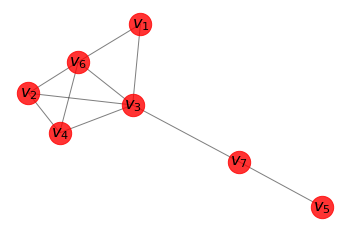

In [15]:
plt_gph_with_vert_lab(A,7)

In [36]:
# El siguiente módulo, crea un array con los primeros "n" genes que deseen obtener del
# Data Frame "data"

#Parametros: data , n 

def get_genes(data,n):
    
    genes_arr = sorted(data) #obtener un array que contiene los elementos del header del DataFrame
    num_genes_extracted = range(n)
    genes = np.array(genes_arr)[num_genes_extracted]
    
    return genes

In [179]:
#Este script es capaz de dibujar el grafo con sus vértices respectivos etiquetados

#Este módulo ha sifo modificado para que sea capaz de etiquetar los nombres de los genes 
#involucrados

def plt_with_label(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    
    labelmap=dict(zip(adj_to_graph.nodes(),get_genes(data,n)))
    
    plt.figure(1,figsize=(12,12))
    nx.draw(adj_to_graph, labels=labelmap, with_labels=True,
    font_size=7,font_weight='bold',font_color='green',edge_color='gray',node_color='blue')
    
    
    
    graph_with_lab=plt.show()
    
    return graph_with_lab

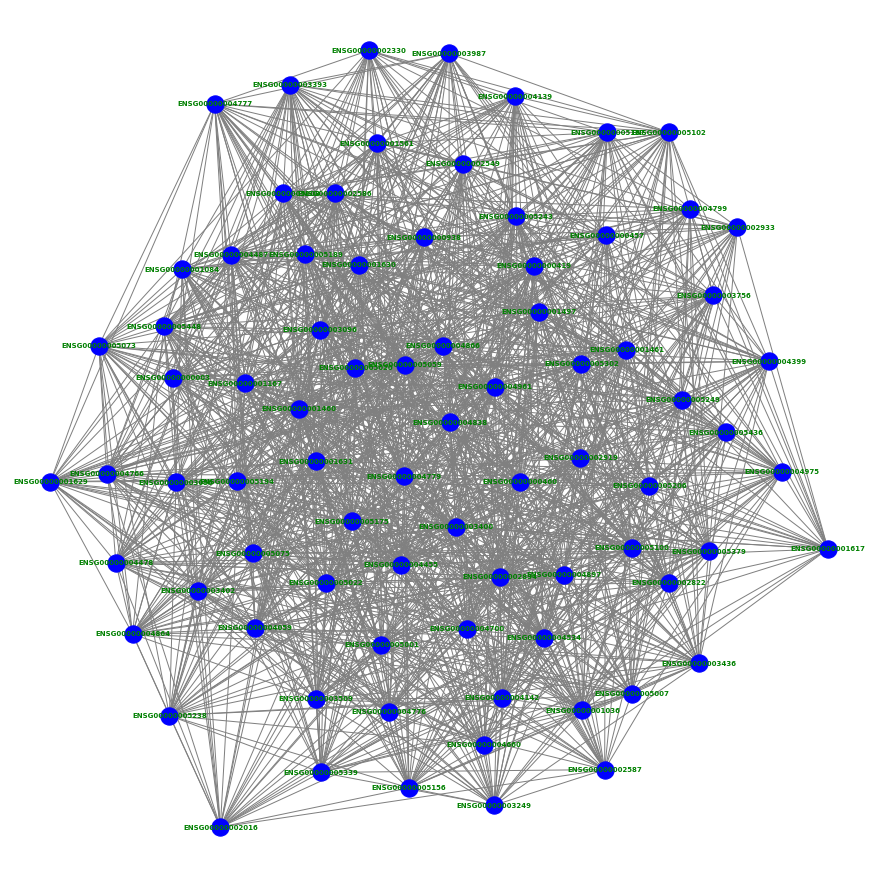

In [180]:
plt_with_label(A,80)

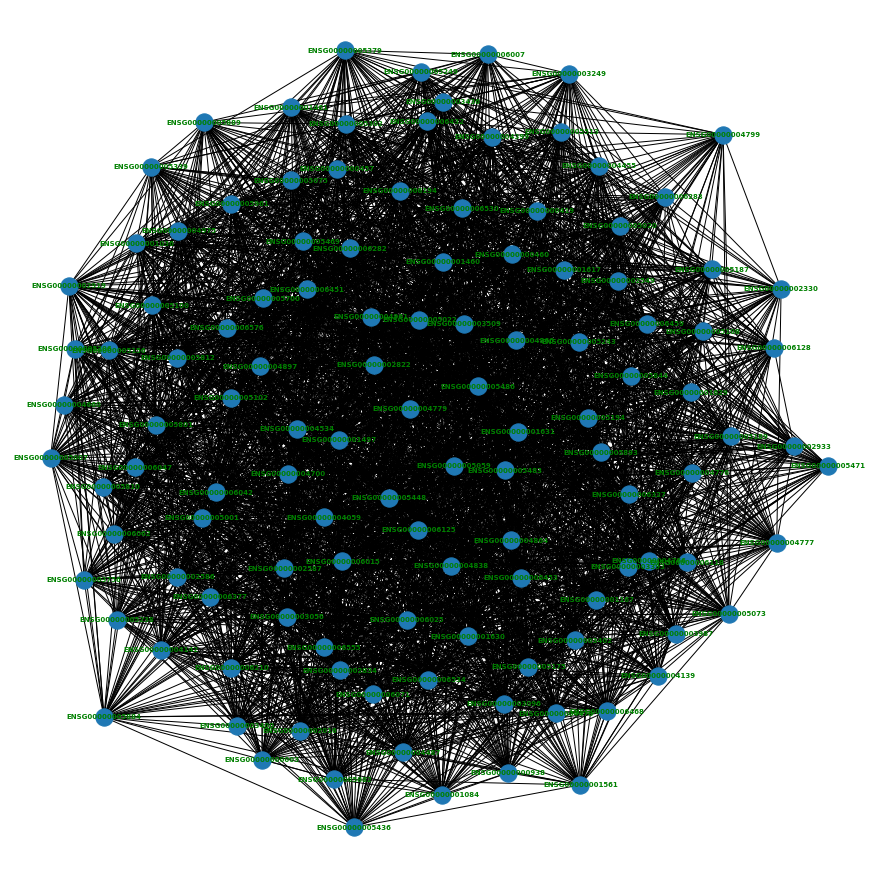

In [152]:
plt_with_label(A,120)

In [64]:
new_data=A.iloc[:7,:7]
    
new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
adj_mod=np.matrix(adj_mat.fillna(0))
adj_mod_trans=adj_mod.transpose()
simm_mat=adj_mod+adj_mod_trans
adj_to_graph=nx.from_numpy_matrix(simm_mat)

In [92]:
labelmap=dict(zip(adj_to_graph.nodes(),range(1,8)))

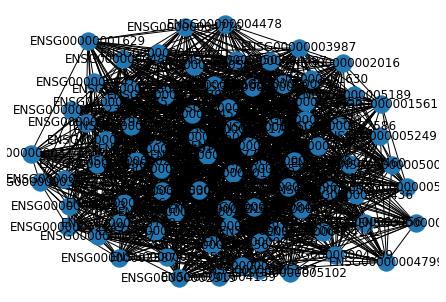

In [153]:
nx.draw(adj_to_graph, labels=labelmap, with_labels=True)
plt.show()

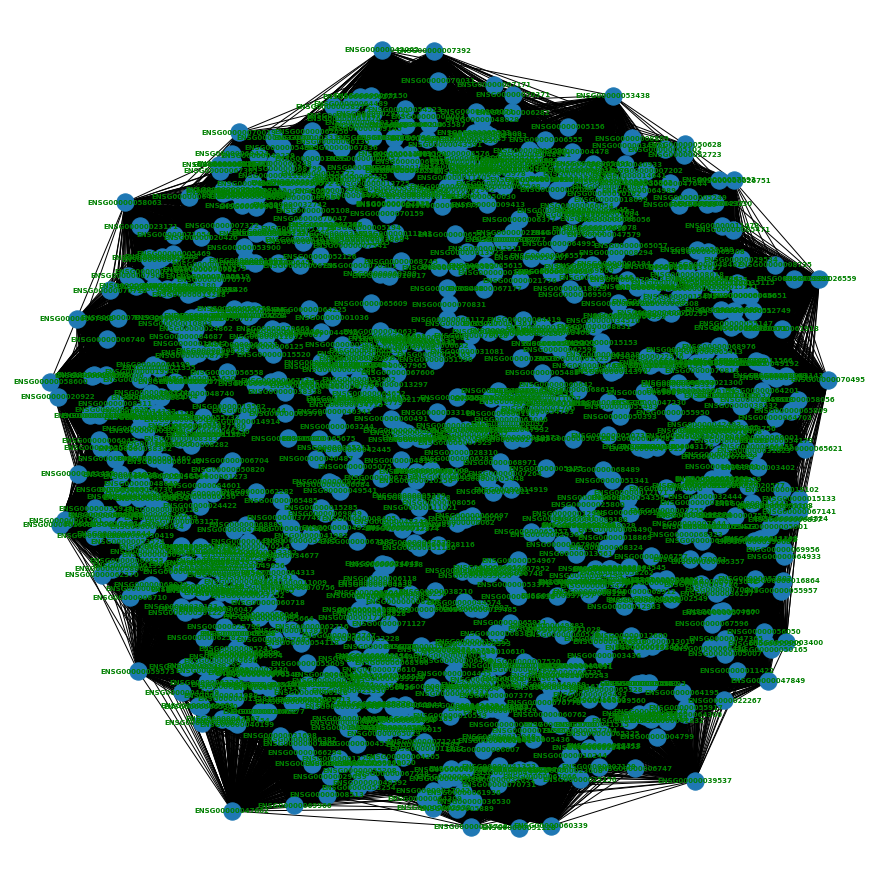

In [154]:
plt_with_label(A,1000)